A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.
(from kaggle)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/Users/Ruby/Desktop/BankChurners.csv").drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','CLIENTNUM'], axis=1)
pd.set_option('display.max_columns', None)#查看所有欄位
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.isnull().sum()#無缺失值

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

1.EDA

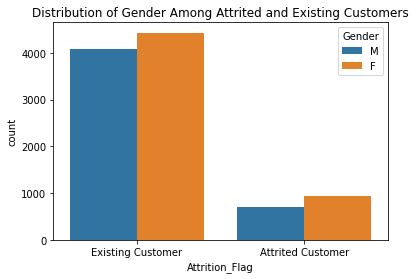

In [4]:
sns.countplot(x='Attrition_Flag', data=df, hue='Gender')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

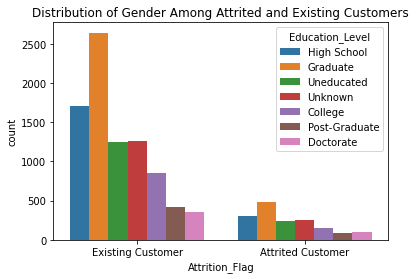

In [5]:
sns.countplot( x='Attrition_Flag', data = df, hue='Education_Level')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

In [7]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

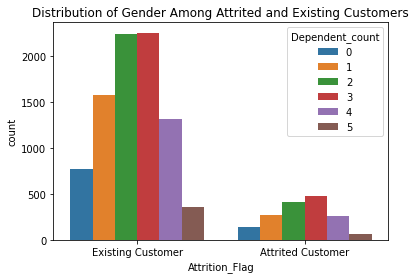

In [9]:
sns.countplot( x='Attrition_Flag', data = df, hue='Dependent_count')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

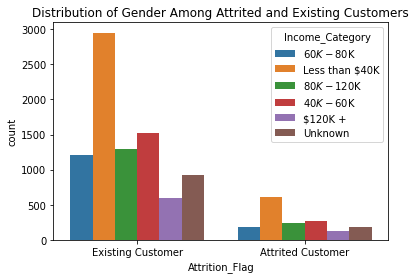

In [10]:
sns.countplot( x='Attrition_Flag', data = df, hue='Income_Category')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

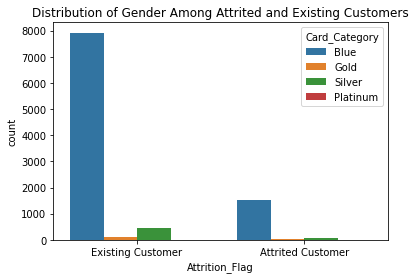

In [11]:
sns.countplot( x='Attrition_Flag', data = df, hue='Card_Category')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

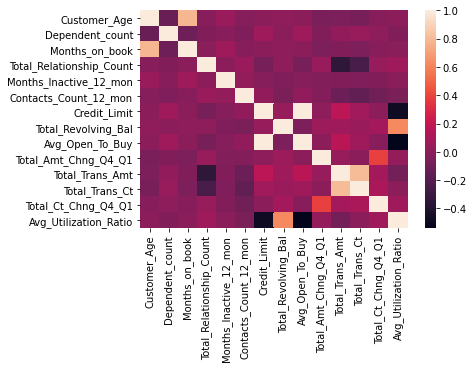

In [16]:
sns.heatmap(df.corr())

2.MinMaxScaler

In [17]:
def split_x_y (df):
   #1. 首先先將資料轉換成數值
    X=df.drop('Attrition_Flag',axis=1).apply(LabelEncoder().fit_transform).values
    y=df['Attrition_Flag'].values.ravel()
    #2. 切分資料，80%作為訓練集，20%作為測試集
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #3. 標準化
    sc = MinMaxScaler()
    X_train = sc.fit_transform(x_train)
    X_test = sc.transform(x_test)
    return(X_train,x_test,y_train,y_test)

In [18]:
X_train,x_test,y_train,y_test=split_x_y(df)

3.Training modle，嘗試兩個model，第一個為knn，第二個為xgboost

In [19]:
#knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knnpredictions = knn.predict(x_test)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",acc*100)

Accuracy Score :  74.03751233958539


In [21]:
#xgboost
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)
xgbpredictions = xgb.predict(x_test)
y_pred = xgb.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",acc*100)

Accuracy Score :  83.95853899308983
